In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [7]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
# Get the stock quote
import yfinance as yf
df = yf.download('AAPL', start='2012-01-01', end='2019-12-18')

# Show the data
df



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801652,394024400
...,...,...,...,...,...,...
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.124268,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.292755,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.193878,133587600


In [15]:
# get the number of rows and columns
df.shape

(2003, 6)

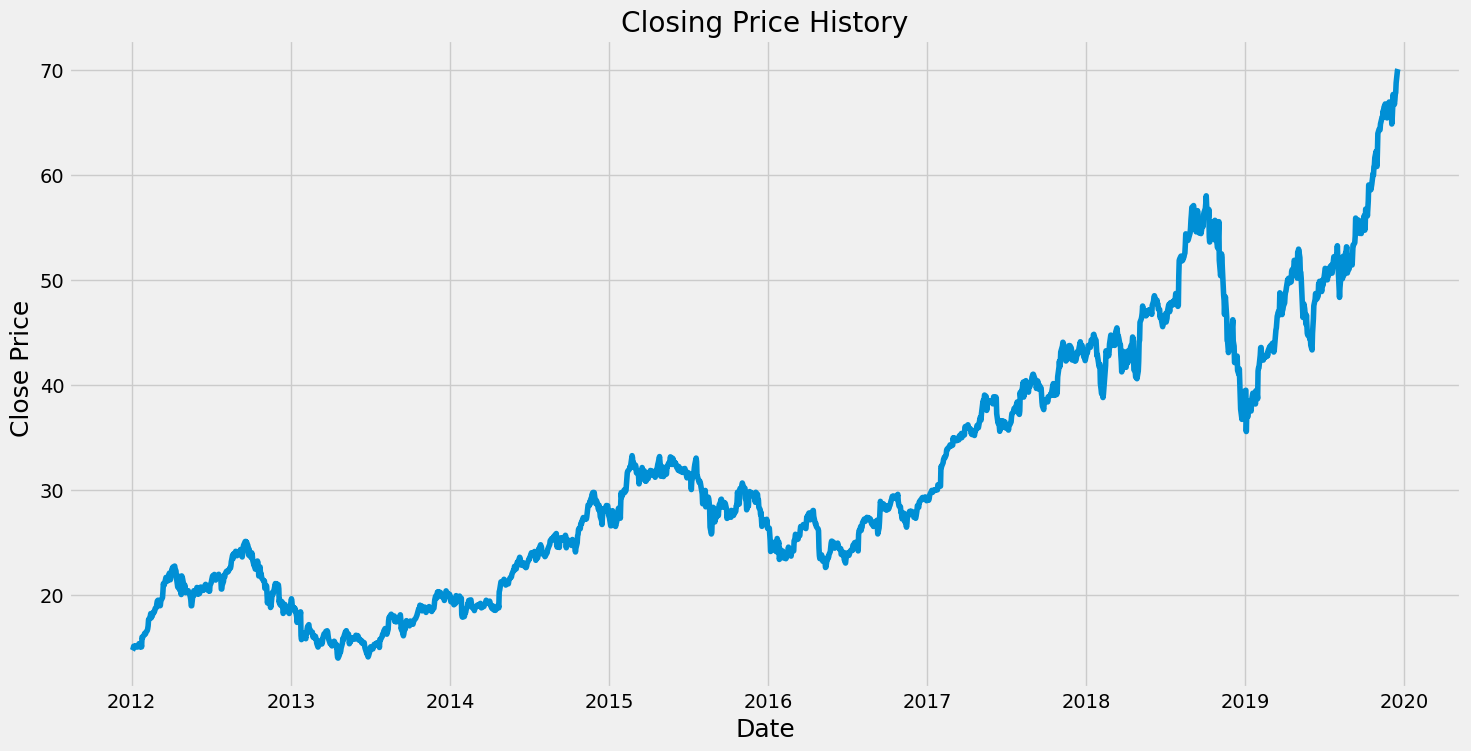

In [16]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.show()

In [17]:
#Create a new dataframe with only the "Close Column"
data= df.filter(['Close'])
#convert the datset into an nump array
dataset= data.values
# get the number of rows to train the model on
training_data_len= math.ceil( len(dataset) * .8)
training_data_len

1603

In [19]:
#scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [21]:
#create the training dataset
# Create the scaled training dataset
train_data= scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [22]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train= np.array(x_train), np.array(y_train)

In [23]:
#Reshape the data
x_train= np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [24]:
#Build the LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False ))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 43s 26ms/step - loss: 8.6776e-04


In [27]:
#Create the testing dataset
#Create a new aray containing scaled values from index 1543 to 2003
test_data= scaled_data[training_data_len-60: ,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [28]:
# convert the data into a numpy array
x_test= np.array(x_test)

In [29]:
#Reshape the data
x_test= np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [30]:
#Get the models predicted price values
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 18ms/step


In [31]:
#Get the root mean squared error(RMSE)
rmse= np.sqrt( np.mean(predictions- y_test)**2)
rmse

0.16936307907104492

<ipython-input-32-ee67af045ef1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


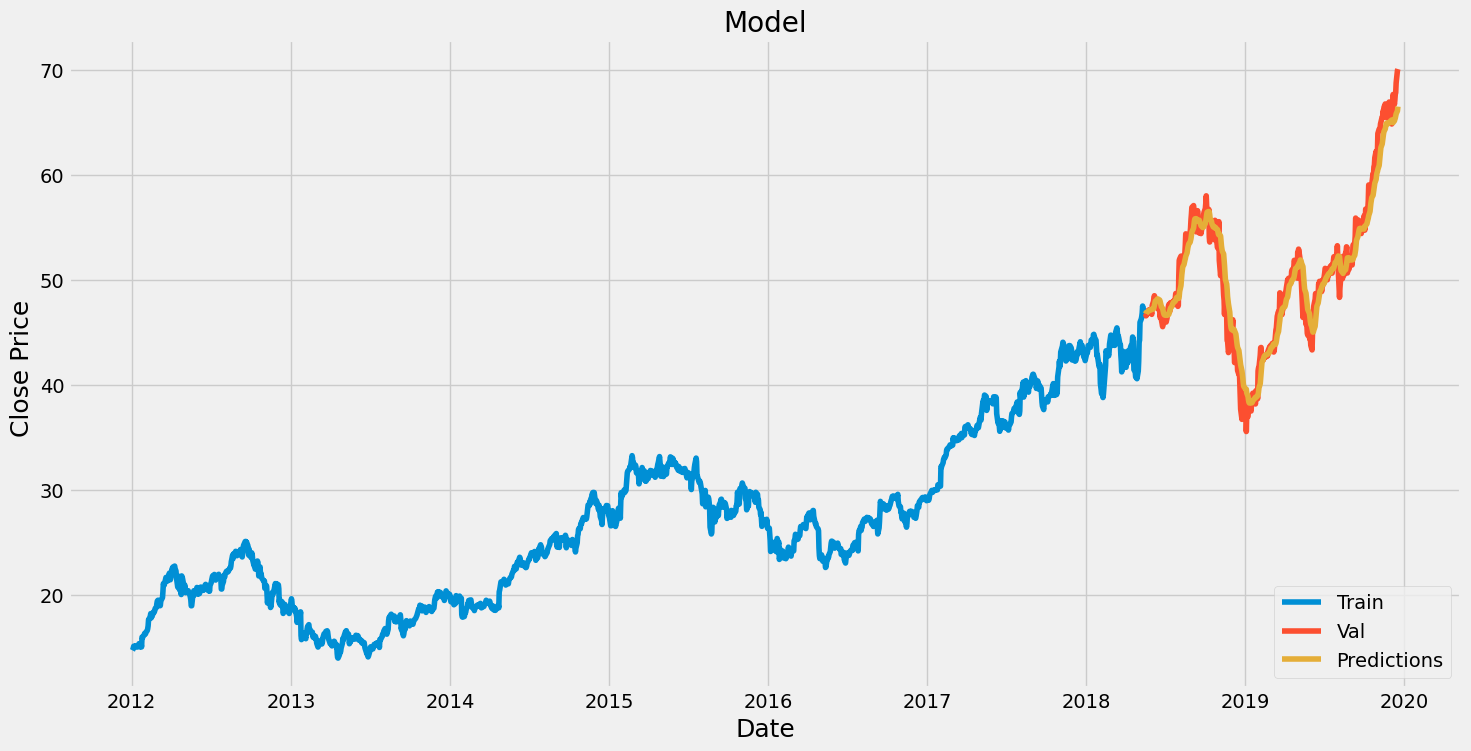

In [32]:
#Plot the data
train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2018-05-17,46.747501,46.777401
2018-05-18,46.577499,46.886364
2018-05-21,46.907501,46.931828
2018-05-22,46.790001,46.974495
2018-05-23,47.090000,46.999584
...,...,...
2019-12-11,67.692497,65.430779
2019-12-12,67.864998,65.623779
2019-12-13,68.787498,65.831673


In [34]:
#Get the quote
apple_quote= yf.download('AAPL', start='2012-01-01', end='2019-12-18')
#Create a new data frame
new_df= apple_quote.filter(['Close'])
# get the last 60 day closing price values ad convert the dataframe into an
last_60_days = new_df[-60:].values
#scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set into a numpy array
X_test= np.array(X_test)
#reshape the data
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price= model.predict(X_test)
#undo teh scaling
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 36ms/step
[[66.94458]]


In [37]:
apple_quote2= yf.download('AAPL', start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-18    69.934998
Name: Close, dtype: float64
